### TASK: SUPPORT VECTOR MACHINES (SVM)

LIBRARY IMPORTING

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing


DATA IMPORTING

In [4]:
from google.colab import files
uploaded=files.upload()

Saving forestfires (1).csv to forestfires (1) (1).csv


In [5]:
df=pd.read_csv('forestfires (1).csv')

In [6]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [7]:
df.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [8]:
data=df.copy()

In [9]:
data.drop(['month','day'],axis=1,inplace=True)

In [10]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


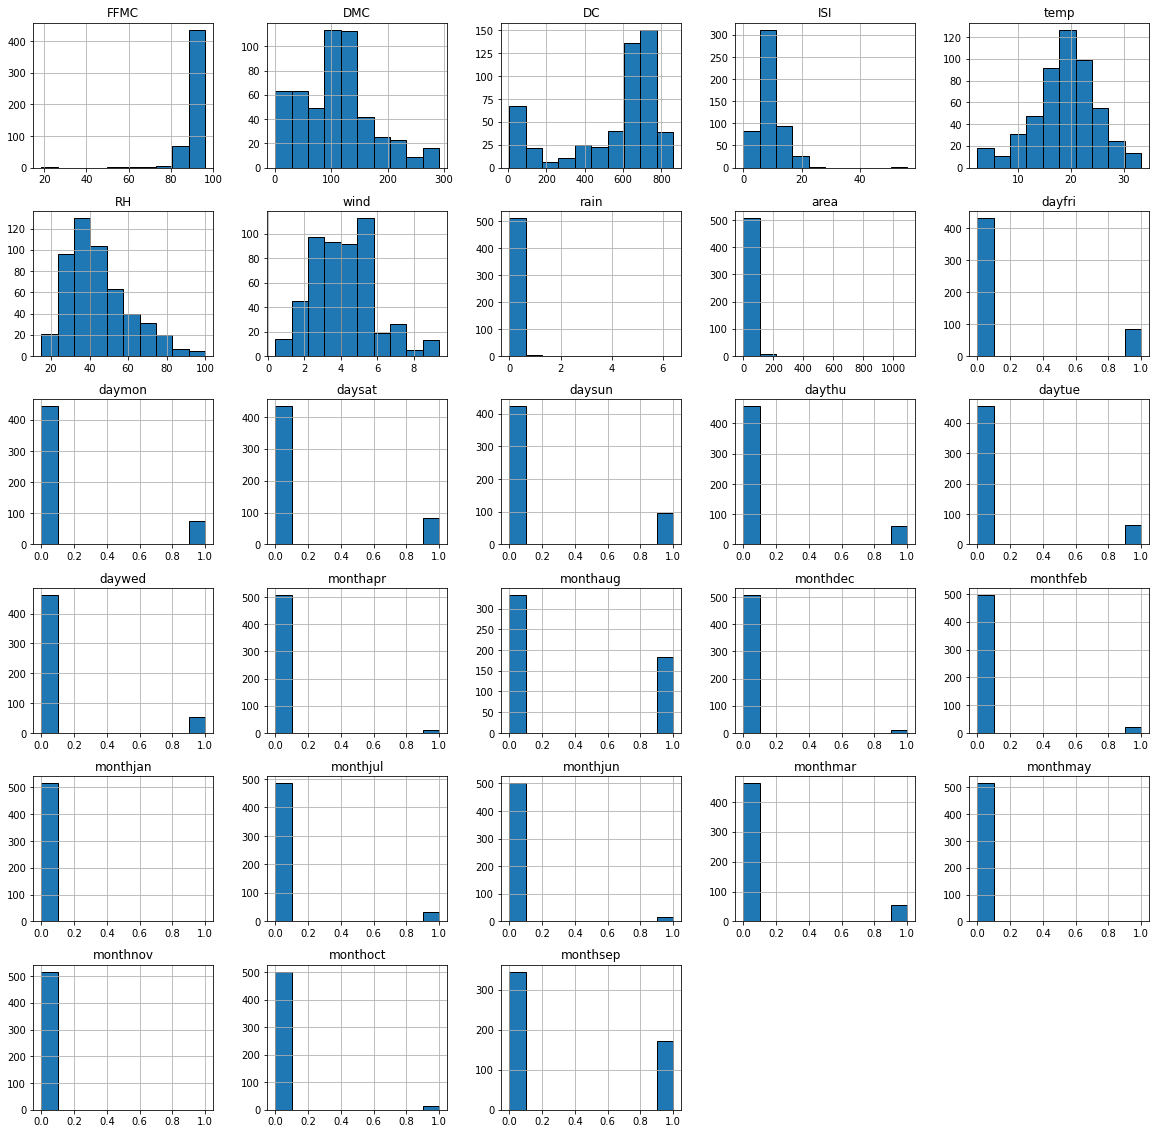

In [11]:
import seaborn as sns
data.hist(edgecolor='black',figsize=(20,20),linewidth=1) 
plt.show()

### STANDARDIZATION

In [12]:
data.iloc[:,0:9]=StandardScaler().fit_transform(data.iloc[:,0:9])

In [13]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,small
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,small
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,small
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,1,0,0,0,0,small
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,1,0,0,0,0,small


In [14]:
data.size_category.value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [15]:
le = preprocessing.LabelEncoder()
data['size_category']= le.fit_transform(data['size_category'])

In [16]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.20202,0,...,0,0,0,0,0,0,0,1,0,1
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.20202,1,...,0,0,0,0,1,0,0,0,0,1
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.20202,0,...,0,0,0,0,1,0,0,0,0,1


SPLITTING THE DATA INTO TRAIN AND TEST

In [17]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]


In [18]:
y.value_counts()

1    378
0    139
Name: size_category, dtype: int64

In [19]:
!pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 'auto', random_state = 42)
x_resample, y_resample = sm.fit_resample(x, y)
y_df = pd.DataFrame(y_resample)
y_df

,size_category
0,1
1,1
2,1
3,1
4,1
...,...
751,0
752,0
753,0
754,0


In [21]:
y_df.size_category.value_counts()

1    378
0    378
Name: size_category, dtype: int64

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x_resample,y_resample,test_size=0.2, random_state=42) 

In [23]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 0.1, 0.001],
                          'gamma': [50, 5, 10, 0.5], 'kernel': ['rbf']}])

In [24]:
gsv.best_params_ , gsv.best_score_

({'C': 14, 'gamma': 0.5, 'kernel': 'rbf'}, 0.8659016393442622)

In [25]:
clf = SVC(C= 14,gamma = 0.5,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

Accuracy = 84.86842105263158


array([[61, 13],
       [10, 68]])

TRAINING ACCURACY:

In [26]:
clf = SVC(C= 14,gamma = 0.5,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_train)
acc = accuracy_score(y_train, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_train, y_pred)

Accuracy = 99.33774834437085


array([[301,   3],
       [  1, 299]])

In [27]:
print(classification_report(y_test,y_pred))

ValueError: ignored

### APPLYING PCA 

In [ ]:
pdata=data.copy()

In [ ]:
pdata.head()

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(random_state=0)
pca_values=pca.fit_transform(x_resample)

In [ ]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_,decimals=4)*100)
var1

In [ ]:
x=pd.DataFrame(pca_values[:,0:15])
x

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y_resample,test_size=0.2, random_state=0) 

In [ ]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[50,5,10,0.5,0.1,0.01],'C':[15,14,13,12,11,10,0.1,0.001] }]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)

In [ ]:
gsv.best_params_ , gsv.best_score_ 

In [ ]:
clf = SVC(C= 15,gamma = 0.1,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_test, y_pred)

In [ ]:
clf = SVC(C= 15,gamma = 0.5,kernel='rbf')
clf.fit(x_train , y_train)
y_pred = clf.predict(x_train)
acc = accuracy_score(y_train, y_pred) * 100
print("Accuracy =", acc)
confusion_matrix(y_train, y_pred)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test,y_pred))